In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ambulance_game as abg

In [2]:
# Tikz picture here

# Single run simulation

In [3]:
# Simulation Parameters
lambda_a = 0.15       # Ambulance: 6 arrivals per hour
lambda_o = 0.2       # Others: 12 arrivals per hour
mu = 0.05            # Service time: 3 services per hour
total_capacity = 8   # Number of servers: 8 servers
threshold = 4        # Threshold of accepting ambulance patients
seed_num = None      # ciw.seed value
runtime = 1440       # runtime of the simulation

In [4]:
records = abg.models.simulate_model(lambda_a=lambda_a, lambda_o=lambda_o, mu=mu, total_capacity=total_capacity, threshold=threshold, seed_num=seed_num, runtime=runtime).get_all_records()
blocks = [b.time_blocked for b in records]
waits = [w.waiting_time for w in records]
print("Mean blocking time: ", np.mean(blocks))
print("Mean waiting time: ", np.mean(waits))

Mean blocking time:  95.94946556868565
Mean waiting time:  0.5862305350095385


# Results of multiple simulations

In [5]:
# Simulation Parameters
lambda_a = 0.15       # Ambulance: 6 arrivals per hour
lambda_o = 0.2       # Others: 12 arrivals per hour
mu = 0.05            # Service time: 3 services per hour
total_capacity = 8   # Number of servers: 8 servers
threshold = 4        # Threshold of accepting ambulance patients
seed_num = None      # ciw.seed value
runtime = 1440       # runtime of the simulation

# Multiple runs parameters
warm_up_time = 100
num_of_trials = 10
output_type = "tuple"
seed_num = None

In [6]:
res = abg.models.get_multiple_runs_results(lambda_a=lambda_a, lambda_o=lambda_o, mu=mu, total_capacity=total_capacity, threshold=threshold, seed_num=seed_num, warm_up_time=warm_up_time, num_of_trials=num_of_trials, output_type=output_type, runtime=runtime)
mean_wait = np.mean([np.mean(w.waiting_times) for w in res])
mean_block = np.mean([np.mean(b.blocking_times) for b in res])
print("Mean blocking time for multiple trials: ", mean_block)
print("Mean waiting time for multiple trials: ", mean_wait)

Mean blocking time for multiple trials:  77.68858061872682
Mean waiting time for multiple trials:  0.24536939458363832


# Timing Experiment 1

In [7]:
# Queueing Parameters
lambda_a = 0.1       # Ambulance: 6 arrivals per hour
lambda_o = 0.05      # Others: 3 arrivals per hour
mu = 0.05            # Service time: 3 services per hour
total_capacity = 8   # Number of servers: 8 servers
threshold = 4        # Threshold of accepting ambulance patients

# Timing Experiment parameters
num_of_trials = 10      # Number of trials to be considered
repetition = 5           # Repetition of each trial
method = "Simulation"     # Method to be used (only Simulation available)
filename = None

In [8]:
times = abg.time_for_different_number_of_trials(lambda_a=lambda_a, lambda_o=lambda_o, mu=mu, total_capacity=total_capacity, threshold=threshold, num_of_trials=num_of_trials, repeat_trial=repetition, method=method, filename=filename)

In [9]:
# Old Files: Trials_500_rep_15, Trials_1000_rep_20
# New Files:

# times = abg.old_import_trials_duration(path='Trials/Trials_343_rep_50.txt')
times = abg.import_trials_duration(path='Trials/Random_File.csv')

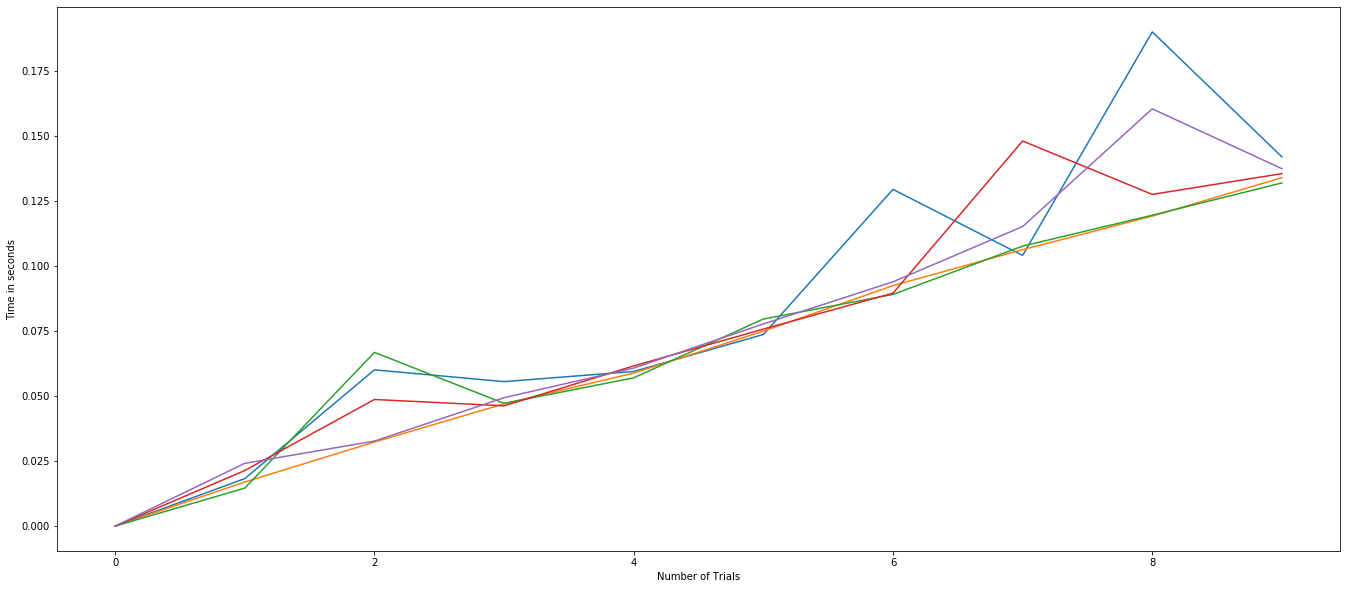

In [10]:
abg.get_duration_all_lines_plot(times=times)
plt.show()

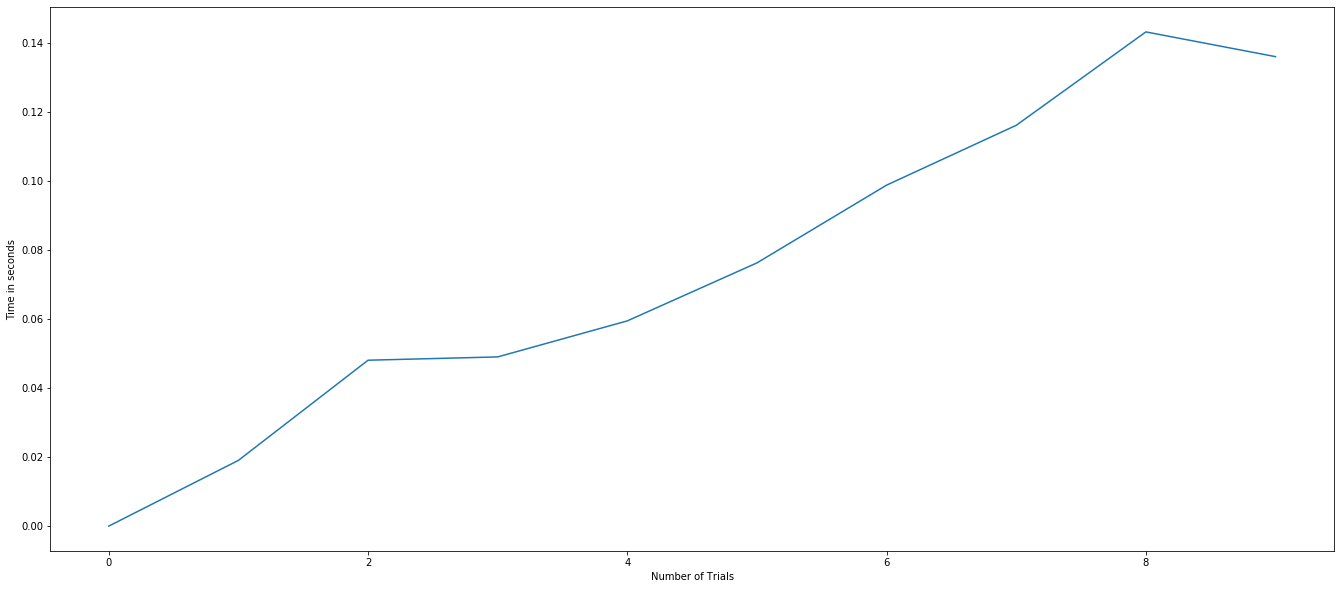

In [11]:
abg.get_duration_mean_plot(times=times)
plt.show()

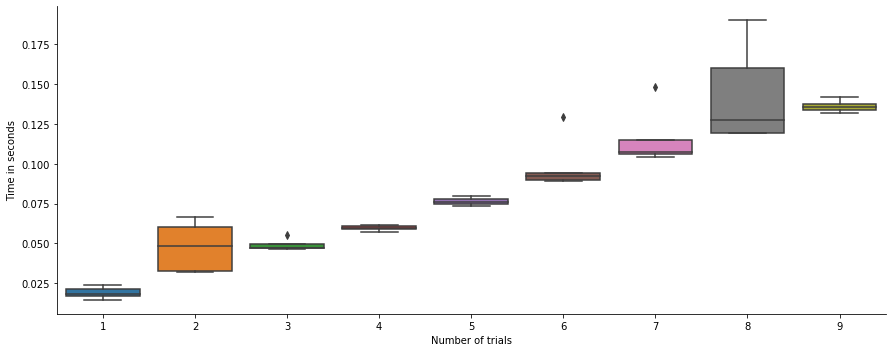

In [12]:
abg.get_duration_distribution_plot(times=times, kind="box")
plt.show()

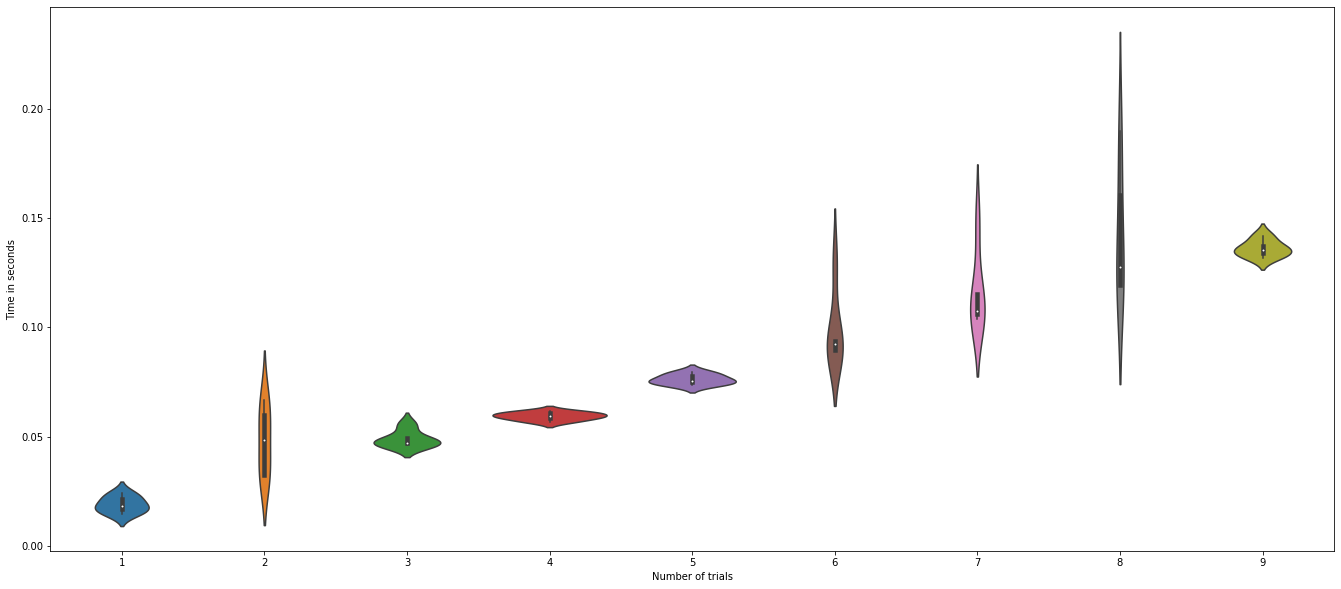

In [13]:
abg.get_duration_distribution_plot(times=times, kind="violin")
plt.show()

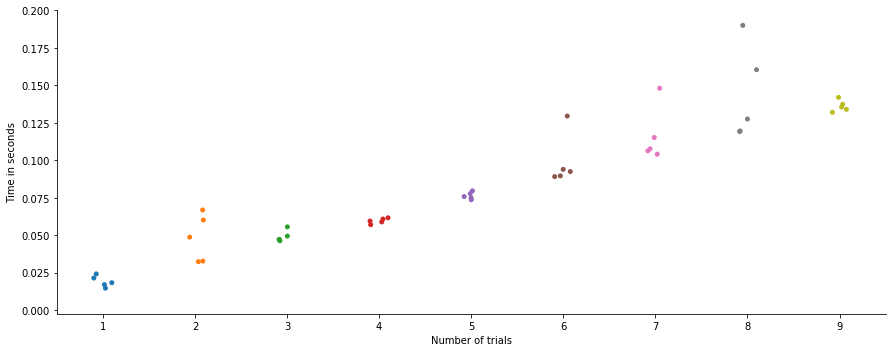

In [14]:
abg.get_duration_distribution_plot(times=times)
plt.show()

# Timing Experiment 2 - Investigate convergence of times

In [15]:
# Queueing Parameters
lambda_a = 0.15      # Ambulance: 9 arrivals per hour
lambda_o = 0.2       # Others: 12 arrivals per hour
mu = 0.05            # Service time: 3 services per hour
total_capacity = 8   # Number of servers: 8 servers
threshold = 4        # Threshold of accepting ambulance patients
seed_num = 5
warm_up_time = 100
output_type = "list"

# Timing Parameters
num_of_trials = 40

In [16]:
time_results = abg.models.get_multiple_runs_results(lambda_a=lambda_a, lambda_o=lambda_o, mu=mu, total_capacity=total_capacity, threshold=threshold, seed_num=seed_num, warm_up_time=warm_up_time, num_of_trials=num_of_trials, output_type=output_type)

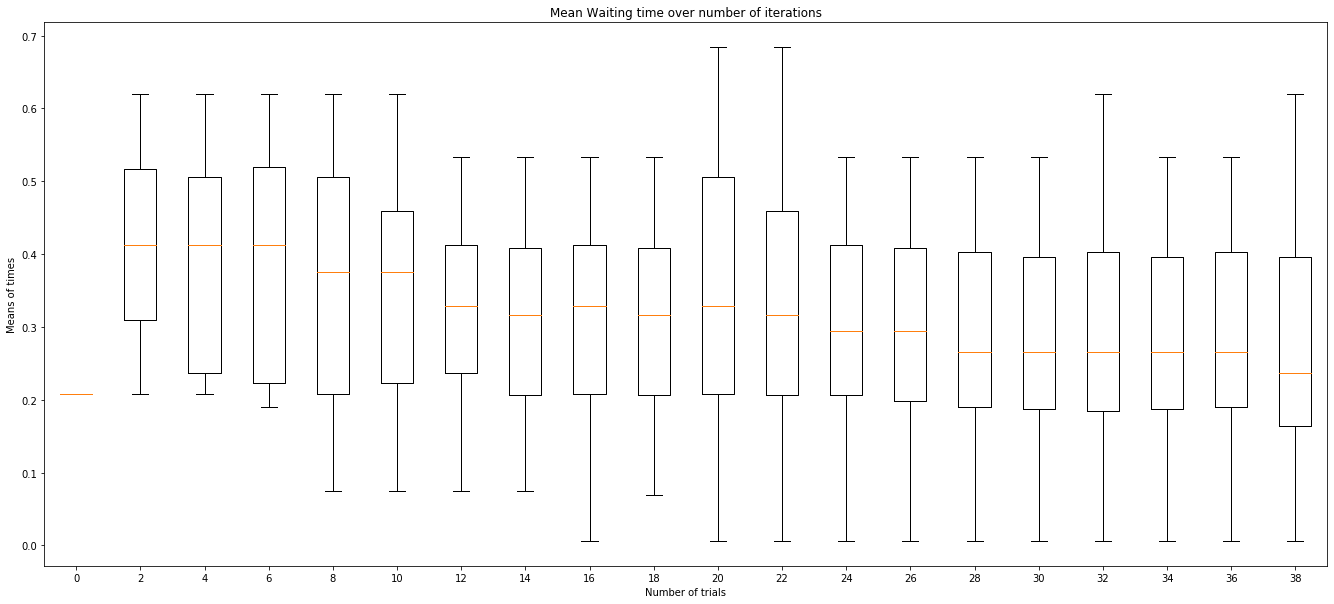

In [17]:
abg.make_plot_of_confidence_intervals_over_iterations(all_times=time_results, time_type="w")
plt.show()

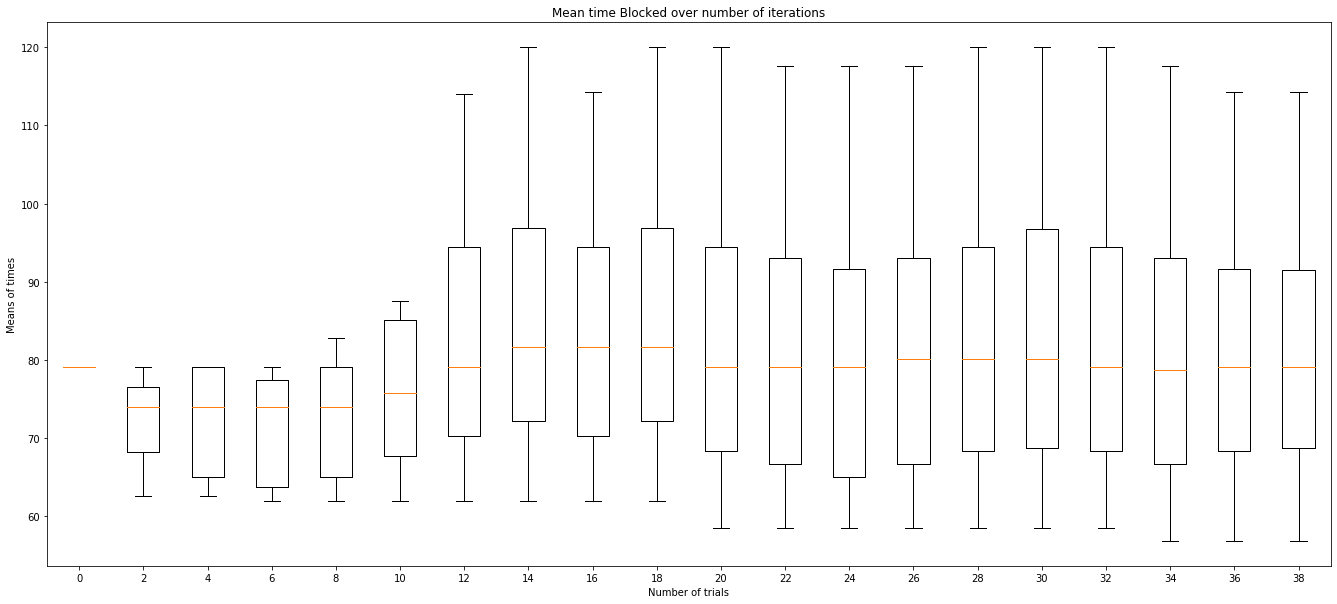

In [18]:
abg.make_plot_of_confidence_intervals_over_iterations(all_times=time_results, time_type="b")
plt.show()

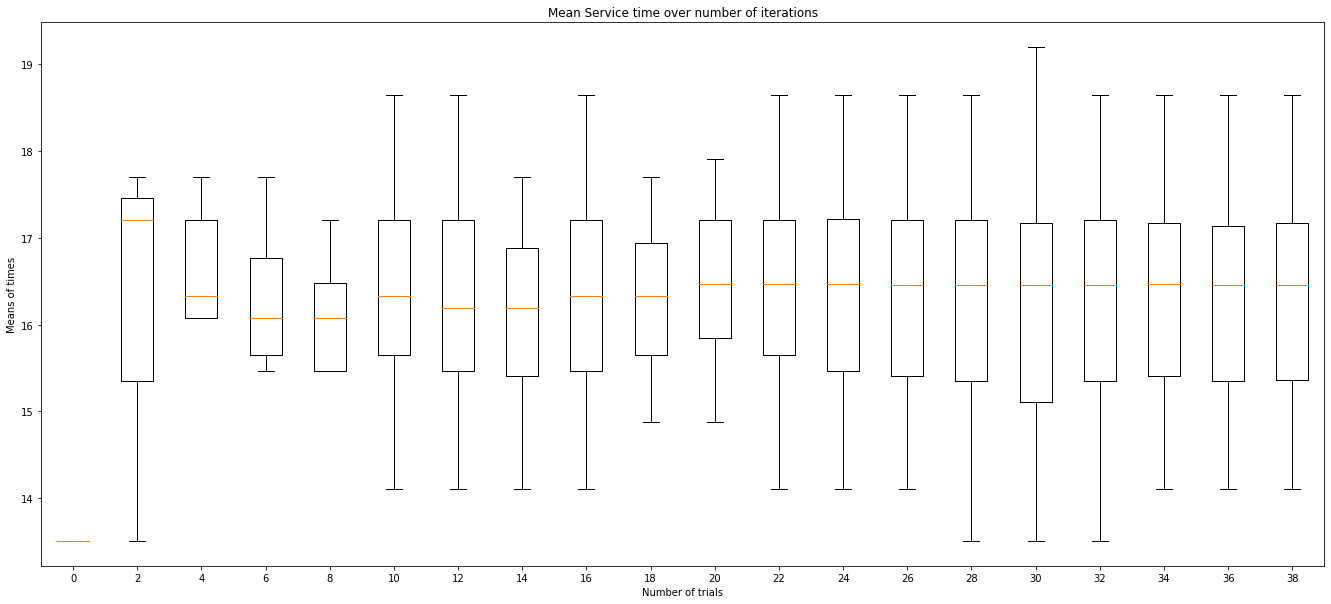

In [19]:
abg.make_plot_of_confidence_intervals_over_iterations(all_times=time_results, time_type="s")
plt.show()

# Model plot 1 - Plots for different thresholds

In [183]:
# Queueing Parameters
lambda_a = 0.1       # Ambulance: 6 arrivals per hour
lambda_o = 0.05      # Others: 3 arrivals per hour
mu = 0.02            # Service time: 3 services per hour
total_capacity = 8   # Number of servers: 8 servers
seed_num = 3
runtime = 1440

# Plot Parameters
num_of_trials = 20
measurement_type = "both"      # The measurement to be plotted ["w":waiting times, "b":blocking times, otherwise: both]
plot_function = np.mean     # The function to be plotted [np.sum or np.mean]

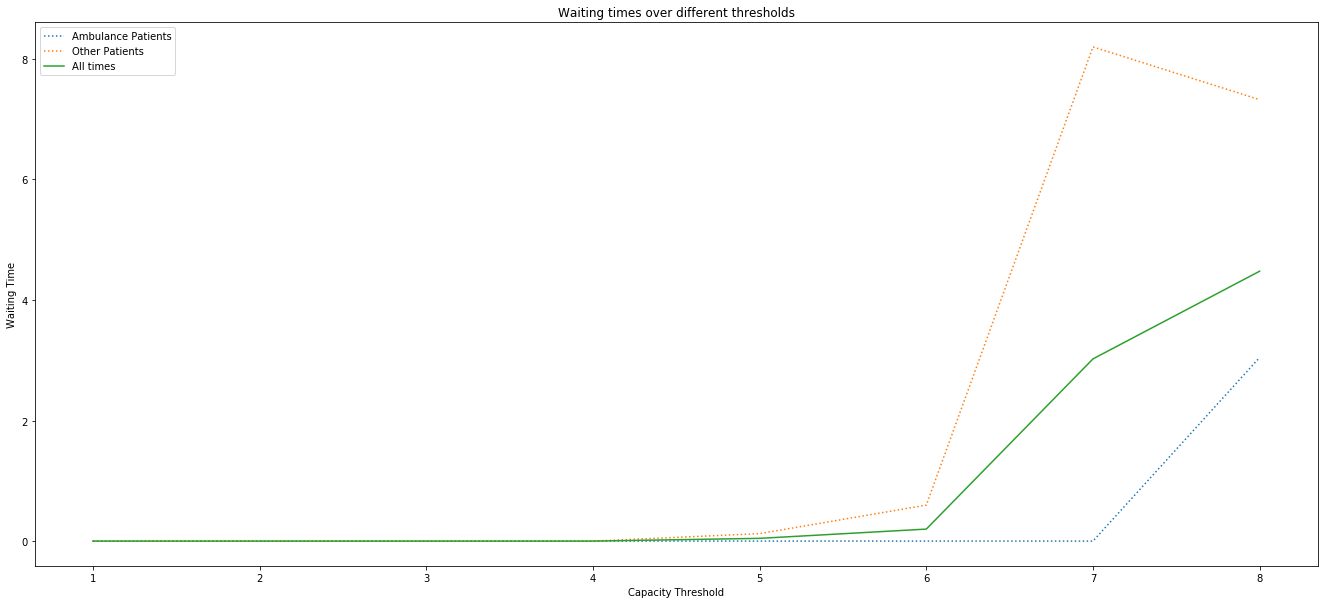

In [184]:
abg.make_plot_for_different_thresholds(lambda_a=lambda_a, lambda_o=lambda_o, mu=mu, total_capacity=total_capacity, num_of_trials=num_of_trials, seed_num=seed_num, measurement_type="w", runtime=runtime)
plt.show()

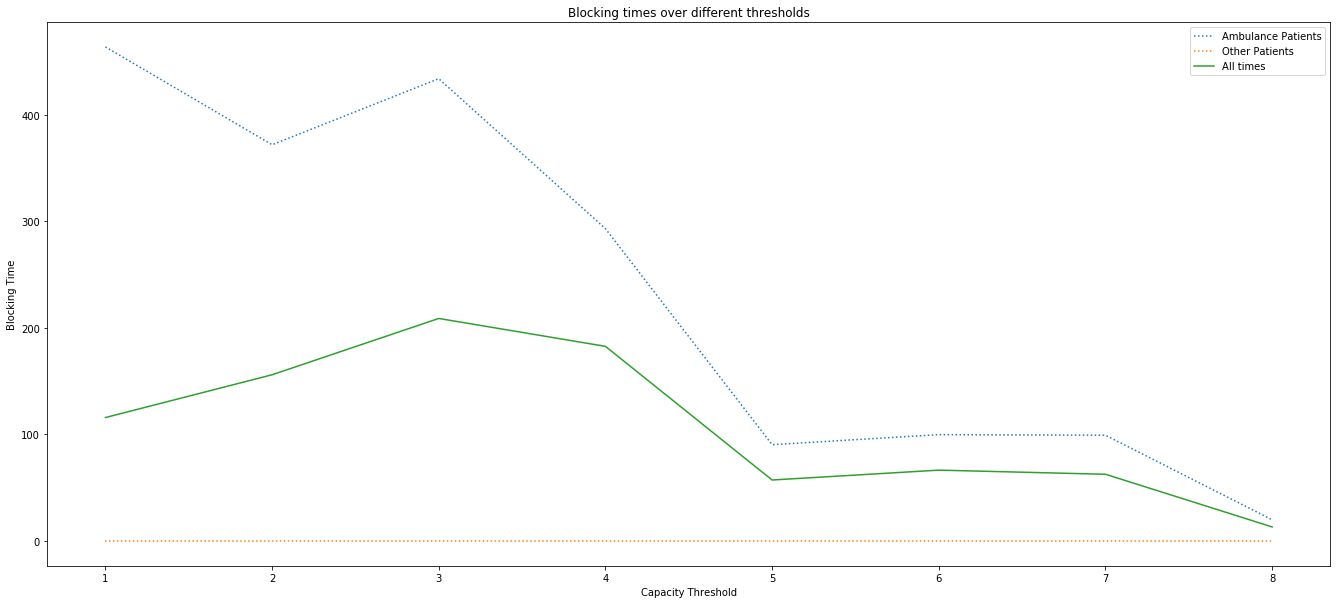

In [185]:
abg.make_plot_for_different_thresholds(lambda_a=lambda_a, lambda_o=lambda_o, mu=mu, total_capacity=total_capacity, num_of_trials=num_of_trials, seed_num=seed_num, measurement_type="b", runtime=runtime)
plt.show()

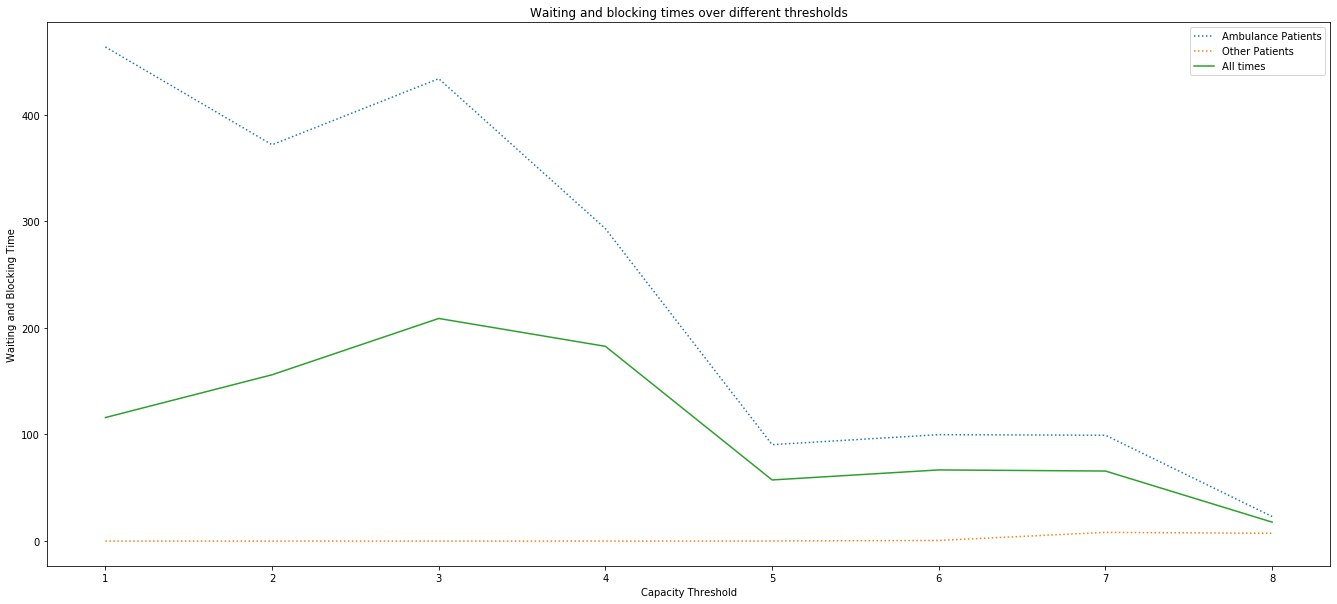

In [186]:
abg.make_plot_for_different_thresholds(lambda_a=lambda_a, lambda_o=lambda_o, mu=mu, total_capacity=total_capacity, num_of_trials=num_of_trials, seed_num=seed_num, measurement_type="both", runtime=runtime)
plt.show()

# Model plot 2 - Plots of proportion within time limit

In [30]:
# Queueing Parameters
lambda_a = 0.1       # Ambulance: 6 arrivals per hour
lambda_o = 0.08      # Others: 4.8 arrivals per hour
mu = 0.03            # Service time: 1.8 services per hour
total_capacity = 6   # Number of servers: 6 servers
seed_num = None
runtime = 1440

# Plot Parameters
num_of_trials = 10
target = 4

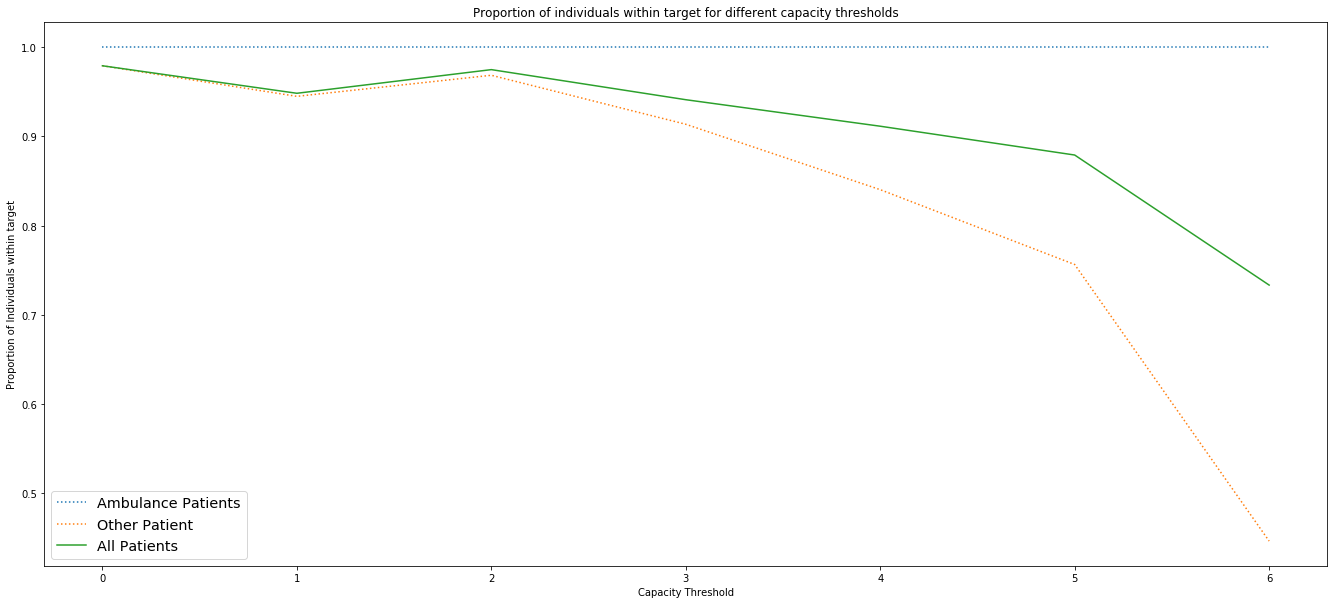

In [31]:
abg.make_proportion_plot(lambda_a=lambda_a, lambda_o=lambda_o, mu=mu, total_capacity=total_capacity, num_of_trials=num_of_trials, seed_num=seed_num, target=target, runtime=runtime)
plt.show()

# Model plot 3 - Plot between two hospitals

In [178]:
# System Parameters
lambda_a = 0.15
runtime

# Hospital 1 Parameters
lambda_o_1 = 0.08      # Others: 4.8 arrivals per hour
mu_1 = 0.03            # Service time: 1.8 services per hour
total_capacity_1 = 6   # Number of servers: 6 servers
threshold_1 = 3

# Hospital 2 Parameters
lambda_o_2 = 0.08
mu_2 = 0.03
total_capacity_2 = 6
threshold_2 = 3

# Plot Parameters
seed_num_1 = 8
seed_num_2 = 8
warm_up_time = 100
num_of_trials = 20
accuracy = 10

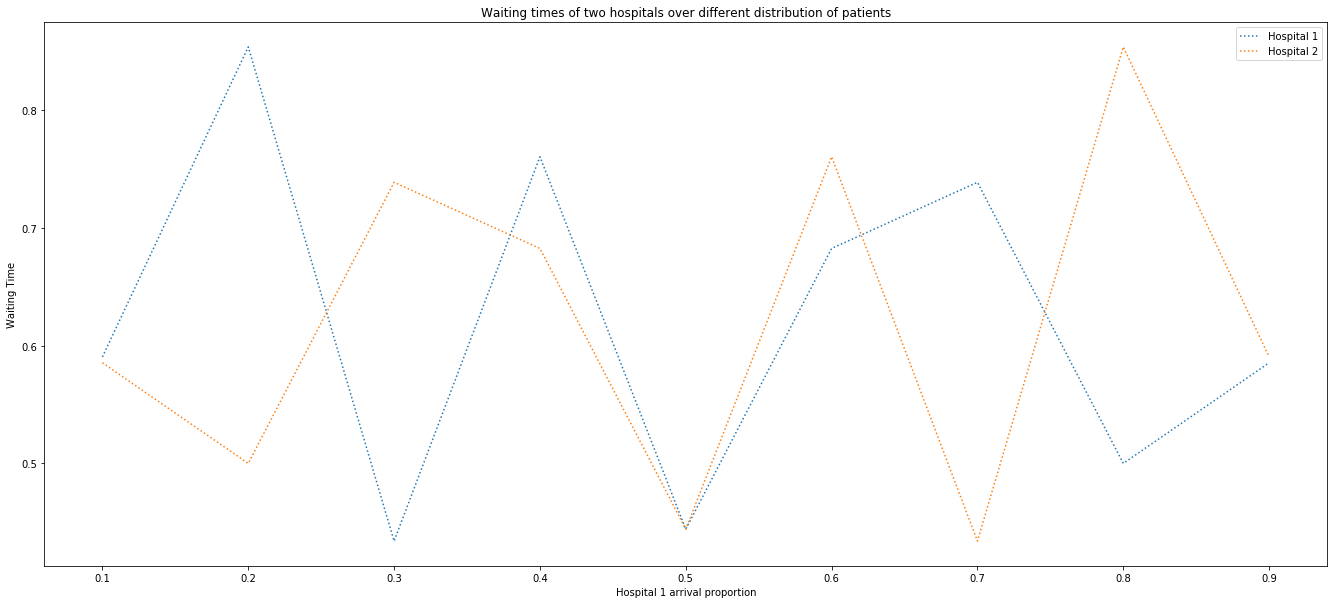

In [179]:
abg.make_plot_two_hospitals_arrival_split(lambda_a=lambda_a, lambda_o_1=lambda_o_1, lambda_o_2=lambda_o_2, mu_1=mu_1, mu_2=mu_2, total_capacity_1=total_capacity_1, total_capacity_2=total_capacity_2, threshold_1=threshold_1, threshold_2=threshold_2, measurement_type="w", seed_num_1=seed_num_1, seed_num_2=seed_num_2, warm_up_time=warm_up_time, trials=num_of_trials, accuracy=accuracy, runtime=runtime)
plt.show()

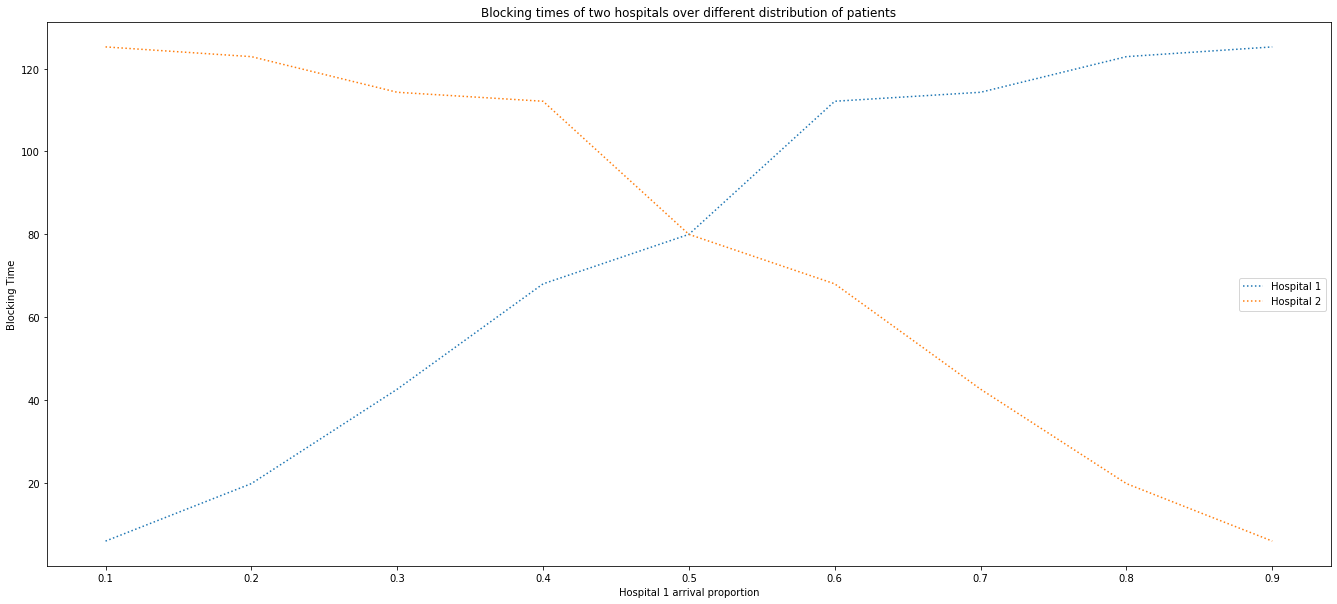

In [180]:
abg.make_plot_two_hospitals_arrival_split(lambda_a=lambda_a, lambda_o_1=lambda_o_1, lambda_o_2=lambda_o_2, mu_1=mu_1, mu_2=mu_2, total_capacity_1=total_capacity_1, total_capacity_2=total_capacity_2, threshold_1=threshold_1, threshold_2=threshold_2, measurement_type="b", seed_num_1=seed_num_1, seed_num_2=seed_num_2, warm_up_time=warm_up_time, trials=num_of_trials, accuracy=accuracy, runtime=runtime)
plt.show()

# Model plot 4 - Waiting/Blocking times confidence intervals vs warm-up time

In [2]:
# Queueing Parameters
lambda_a = 0.1       # Ambulance: 6 arrivals per hour
lambda_o = 0.08      # Others: 4.8 arrivals per hour
mu = 0.03            # Service time: 1.8 services per hour
total_capacity = 6   # Number of servers: 6 servers
threshold = 3
seed_num = 1
runtime = 1440

# Plot Parameters
min_w = 0
max_w = 500
num_of_trials = 3

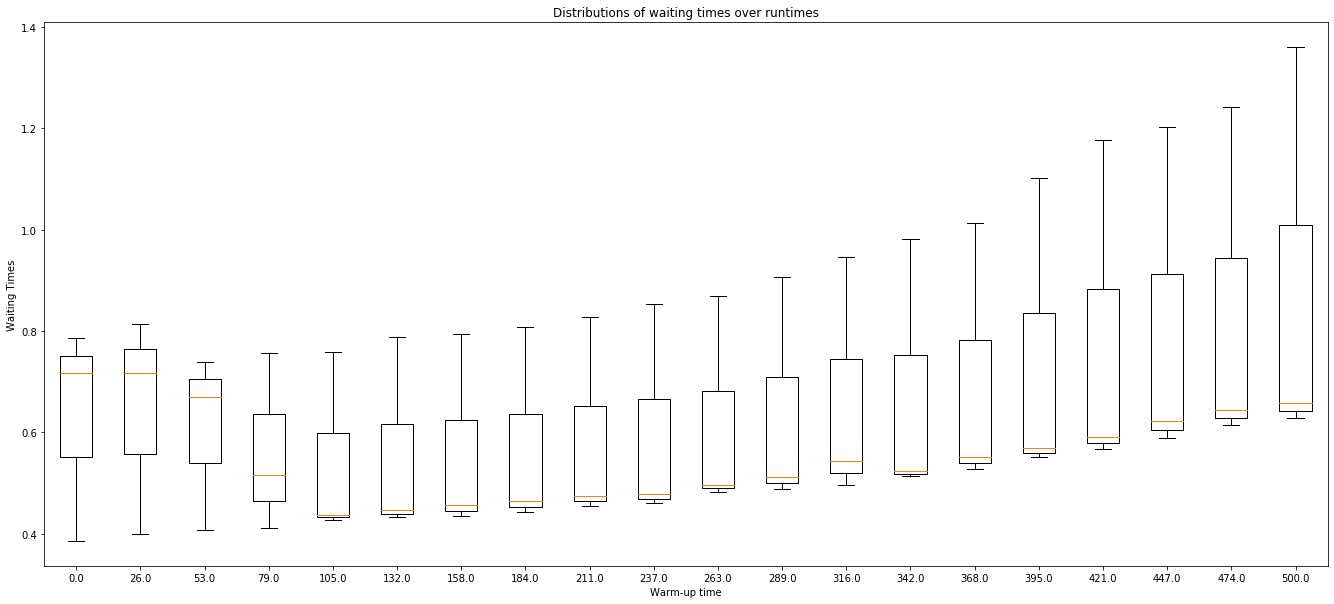

In [3]:
abg.make_plot_of_confidence_intervals_over_warm_up_time(lambda_a=lambda_a, lambda_o=lambda_o, mu=mu, total_capacity=total_capacity, threshold=threshold, num_of_trials=num_of_trials, min_w=min_w, max_w=max_w, seed_num=seed_num, measurement_type="w", runtime=runtime)
plt.show()

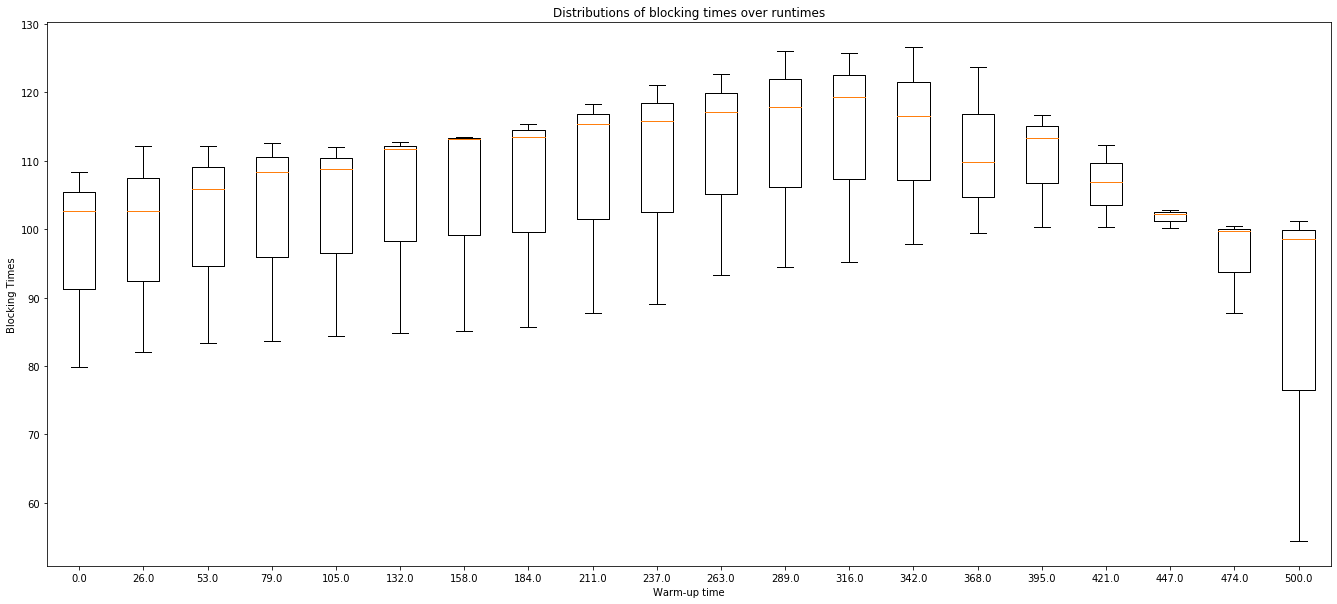

In [4]:
abg.make_plot_of_confidence_intervals_over_warm_up_time(lambda_a=lambda_a, lambda_o=lambda_o, mu=mu, total_capacity=total_capacity, threshold=threshold, num_of_trials=num_of_trials, min_w=min_w, max_w=max_w, seed_num=seed_num, measurement_type="b", runtime=runtime)
plt.show()

# Model plot 5 - Waiting/Blocking times confidence intervals vs runtime

In [3]:
# Queueing Parameters
lambda_a = 0.1       # Ambulance: 6 arrivals per hour
lambda_o = 0.08      # Others: 4.8 arrivals per hour
mu = 0.03            # Service time: 1.8 services per hour
total_capacity = 6   # Number of servers: 6 servers
threshold = 4
seed_num = 2
warm_up_time = 200

# Plot Parameters
min_r = 700
max_r = 2800
num_of_trials = 5

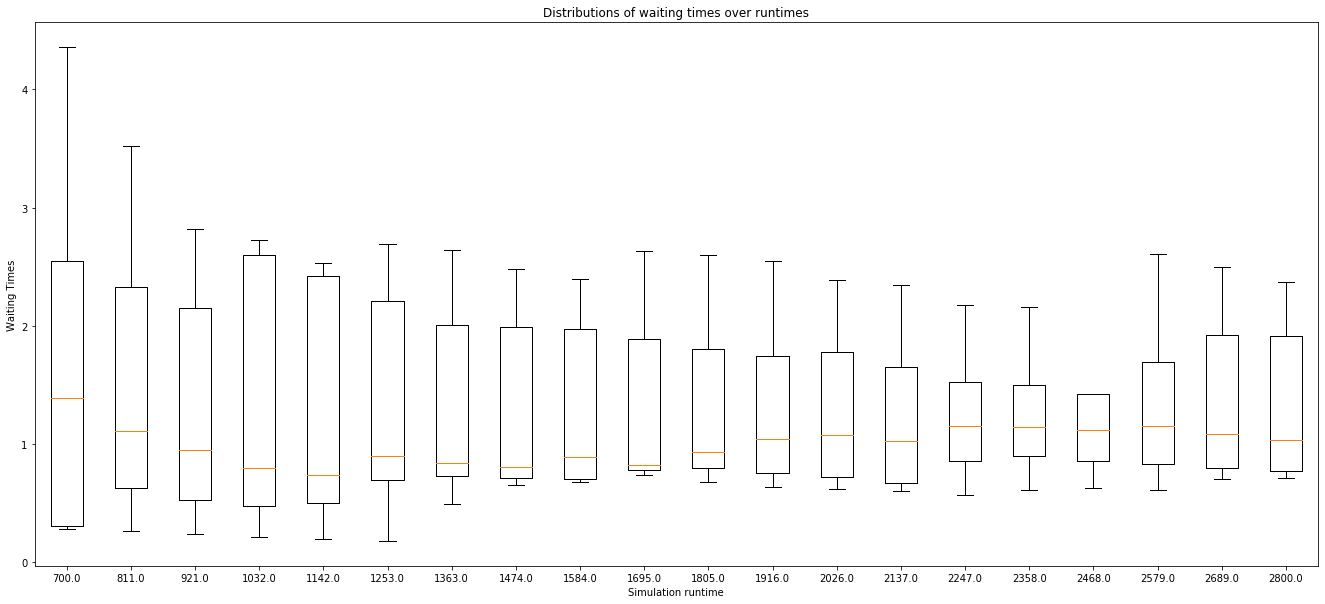

In [4]:
abg.make_plot_of_confidence_intervals_over_runtime(lambda_a=lambda_a, lambda_o=lambda_o, mu=mu, total_capacity=total_capacity, threshold=threshold, warm_up_time=warm_up_time, num_of_trials=num_of_trials, min_r=min_r, max_r=max_r, seed_num=seed_num, measurement_type="w")
plt.show()

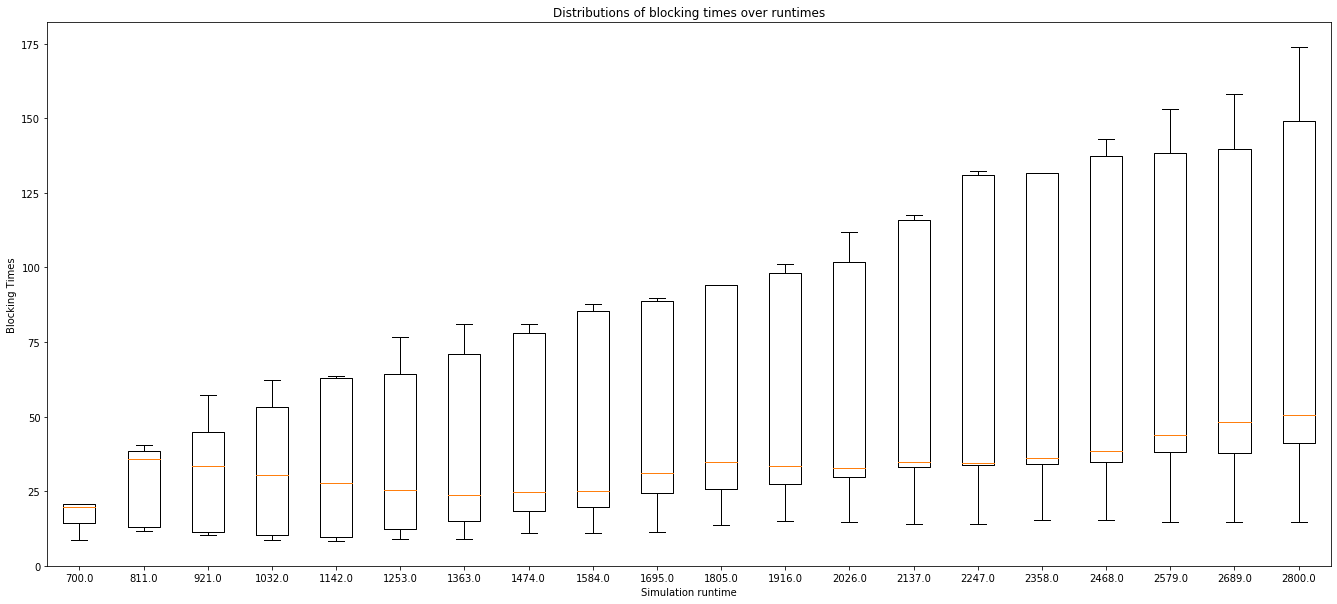

In [5]:
abg.make_plot_of_confidence_intervals_over_runtime(lambda_a=lambda_a, lambda_o=lambda_o, mu=mu, total_capacity=total_capacity, threshold=threshold, warm_up_time=warm_up_time, num_of_trials=num_of_trials, min_r=min_r, max_r=max_r, seed_num=seed_num, measurement_type="b")
plt.show()

# Examples for testing

In [170]:
ciw.seed(5)
Q = ciw.Simulation(build_model(1, 1, 2, 1))

Q.simulate_until_max_time(100)
records = Q.get_all_records()
waits = [r.waiting_time for r in records]
blocks = [r.time_blocked for r in records]

print(len(records))
print(sum(waits))
print(sum(blocks))

290
1089.854729732795
0.0


In [171]:
ciw.seed(5)
Q = ciw.Simulation(build_model(1, 1, 2, 1), node_class=build_custom_node(7))

Q.simulate_until_max_time(100)
records = Q.get_all_records()
waits = [r.waiting_time for r in records]
blocks = [r.time_blocked for r in records]

print(len(records))
print(sum(waits))
print(sum(blocks))

290
1040.318433783405
52.00679633745028


In [172]:
sim_results = []
for i in range(10):
    simulation = simulate_model(0.15, 0.2, 0.05, 8, 4, i)
    sim_results.append(len(simulation.get_all_records()))

In [173]:
sim_results

[699, 719, 759, 715, 703, 719, 695, 685, 775, 719]

# To Discuss

In [95]:
# Simulation Parameters
lambda_a = 0.15       # Ambulance: 6 arrivals per hour
lambda_o = 0.2       # Others: 3 arrivals per hour
mu = 0.05            # Service time: 3 services per hour
total_capacity = 8   # Number of servers: 8 servers
threshold = 4        # Threshold of accepting ambulance patients
seed_num = None      # ciw.seed value

In [96]:
dummy_model = abg.models.simulate_model(lambda_a, lambda_o, mu, total_capacity, threshold, seed_num).get_all_records()

In [97]:
dummy_waits_node_1 = [i.waiting_time for i in demo if i.node == 1]
dummy_blocs_node_2 = [i.time_blocked for i in demo if i.node == 2]

In [98]:
print(all(dummy_waits_node_1) == 0)
print(all(dummy_blocs_node_2) == 0)

True
True


###### For any parmeters all waiting times from node 1 will be 0 and all blocking times from node 2 will be 0

In [69]:
dummy_waits_node_1

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [70]:
dummy_blocs_node_2

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

# Dummy Cells